In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel("01_District_wise_crimes_committed_IPC_2001_2021.xlsx",parse_dates=True)

In [3]:
df['STATE/UT'] = df['STATE/UT'].str.strip()
df['DISTRICT'] = df['DISTRICT'].str.strip()

df = df[df['DISTRICT'] != 'TOTAL']
df = df[df['DISTRICT'] != 'ZZ TOTAL']
df = df[df['DISTRICT'] != 'Total']

In [4]:
df['STATE/UT'] = df['STATE/UT'].str.title()
df['DISTRICT'] = df['DISTRICT'].str.title()
replacement = 'Andaman & Nicobar Island'
df['STATE/UT'] =  df['STATE/UT'].str.replace('A&N Islands', replacement).replace('A & N Islands', replacement)
df['STATE/UT'] =  df['STATE/UT'].str.replace('D & N Haveli', 'D&N Haveli').replace('D & N Haveli', 'D&N Haveli')
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

In [5]:
df.head(40)

,YEAR,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE,RAPE,KIDNAPPING & ABDUCTION,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001-01-01,Andhra Pradesh,Adilabad,101,60,17.0,50,46,9,0,...,1,30,1131,16,149,34,175,181,1518,4154
1,2001-01-01,Andhra Pradesh,Anantapur,151,125,1.0,23,53,8,0,...,8,69,1543,7,118,24,154,270,754,4125
2,2001-01-01,Andhra Pradesh,Chittoor,101,57,2.0,27,59,4,0,...,9,38,2088,14,112,83,186,404,1262,5818
3,2001-01-01,Andhra Pradesh,Cuddapah,80,53,1.0,20,25,1,0,...,2,23,795,17,126,38,57,233,1181,3140
4,2001-01-01,Andhra Pradesh,East Godavari,82,67,1.0,23,49,4,0,...,3,41,1244,12,109,58,247,431,2313,6507
5,2001-01-01,Andhra Pradesh,Guntakal Rly.,3,1,0.0,0,0,5,0,...,3,0,1,0,1,0,0,4,104,287
6,2001-01-01,Andhra Pradesh,Guntur,182,88,2.0,54,82,16,3,...,8,43,1792,7,139,129,378,369,2426,7848
7,2001-01-01,Andhra Pradesh,Hyderabad City,111,113,7.0,37,80,13,0,...,24,0,3137,24,118,27,746,409,1512,11831
8,2001-01-01,Andhra Pradesh,Karimnagar,162,85,6.0,56,67,27,1,...,5,33,1392,62,414,81,224,322,1726,5811
9,2001-01-01,Andhra Pradesh,Khammam,93,60,1.0,47,41,1,0,...,5,73,1026,17,180,336,172,209,1450,4582


In [6]:
df['STATE/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Andaman & Nicobar Island', 'Chandigarh',
       'D&N Haveli', 'Daman & Diu', 'Delhi Ut', 'Lakshadweep',
       'Puducherry', 'Telangana', 'Harayana', 'Chattisgarh', 'Ladakh'],
      dtype=object)

In [7]:
df.columns

Index(['YEAR', 'STATE/UT', 'DISTRICT', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE', 'RAPE', 'KIDNAPPING & ABDUCTION', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING',
       'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16219 entries, 0 to 16697
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   YEAR                                                 16219 non-null  datetime64[ns]
 1   STATE/UT                                             16219 non-null  object        
 2   DISTRICT                                             16219 non-null  object        
 3   MURDER                                               16219 non-null  int64         
 4   ATTEMPT TO MURDER                                    16219 non-null  int64         
 5   CULPABLE HOMICIDE                                    16218 non-null  float64       
 6   RAPE                                                 16219 non-null  int64         
 7   KIDNAPPING & ABDUCTION                               16219 non-null  int64         
 

In [9]:
df.describe()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE,RAPE,KIDNAPPING & ABDUCTION,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,16219.000000,16219.000000,16218.000000,16219.000000,16219.000000,16219.000000,16219.000000,16219.000000,16219.000000,16219.000000,...,16219.000000,16219.000000,16219.000000,16219.000000,16219.000000,16219.000000,16219.000000,16219.000000,16219.000000,16219.000000
mean,42.143844,49.232998,5.822605,34.488070,59.053517,5.585733,6.045379,37.937049,148.528208,506.948579,...,7.125224,12.100561,327.400456,9.864480,67.975091,12.349282,119.426475,137.412233,1278.528269,3288.550096
std,41.194519,97.708379,16.778192,43.963487,116.569664,10.317830,35.167910,89.951330,336.572029,1422.216549,...,52.490935,24.502185,561.832843,14.241704,98.342481,41.145073,205.684048,161.716871,2358.887255,4295.739814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,9.000000,0.000000,8.000000,7.000000,0.000000,0.000000,5.000000,27.000000,79.000000,...,0.000000,2.000000,20.000000,0.000000,8.000000,0.000000,10.000000,10.000000,208.000000,853.000000
50%,33.000000,28.000000,2.000000,22.000000,25.000000,2.000000,0.000000,16.000000,80.000000,204.000000,...,1.000000,7.000000,115.000000,4.000000,33.000000,1.000000,50.000000,93.000000,705.000000,2247.000000
75%,57.000000,57.000000,5.000000,46.000000,67.000000,7.000000,2.000000,39.000000,169.000000,445.000000,...,3.000000,16.000000,377.000000,14.000000,90.000000,8.000000,146.000000,200.000000,1562.000000,4223.000000
max,565.000000,3277.000000,598.000000,713.000000,3970.000000,347.000000,2094.000000,3055.000000,11455.000000,37734.000000,...,3696.000000,2350.000000,9982.000000,178.000000,2183.000000,1257.000000,3546.000000,2058.000000,80713.000000,88388.000000


In [10]:
# Calculate the sum of 'CRUELTY BY HUSBAND OR HIS RELATIVES' grouped by 'YEAR'
grouped_data = df.groupby('YEAR')['CRUELTY BY HUSBAND OR HIS RELATIVES'].sum()

In [11]:
data = pd.DataFrame(grouped_data, columns=['CRUELTY BY HUSBAND OR HIS RELATIVES'])
data

,CRUELTY BY HUSBAND OR HIS RELATIVES
YEAR,
2001-01-01,49308
2002-01-01,49372
2003-01-01,51914
2004-01-01,59375
2005-01-01,59643
2006-01-01,64856
2007-01-01,77717
2008-01-01,82731
2009-01-01,90829


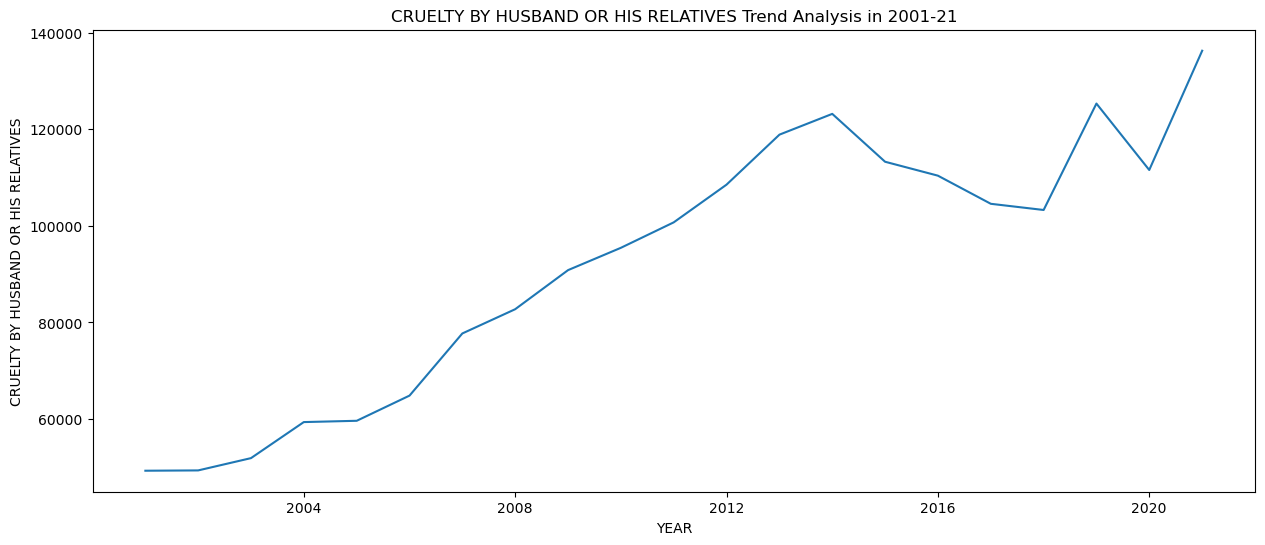

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('YEAR')
plt.ylabel('CRUELTY BY HUSBAND OR HIS RELATIVES')
plt.title('CRUELTY BY HUSBAND OR HIS RELATIVES Trend Analysis in 2001-21')
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def test_stationarity(dataframe: pd.DataFrame, var: str):
    """
    Test stationarity of a variable in a dataframe.
    
    Args:
        dataframe (pd.DataFrame): The input dataframe.
        var (str): The variable to test for stationarity.
    """
    dataframe['rolling_mean'] = dataframe[var].rolling(window=1).mean()
    dataframe['rolling_std'] = dataframe[var].rolling(window=1).std()

    adftest1 = adfuller(dataframe[var], autolag='AIC')
    
    stats = pd.Series(adftest1[0:4], index=['TEST STATS', 'P-VALUE', '# LAGS USED', 'NUMBER OF OBSERVATION USED'])
    print(stats)
    for key, values in adftest1[4].items():
        print("Criticality",key,":", values)

    sns.lineplot(data=dataframe, x=dataframe.index, y=var)
    #sns.lineplot(data=dataframe, x=dataframe.index, y='rolling_mean')
    #sns.lineplot(data=dataframe, x=dataframe.index, y='rolling_std')

TEST STATS                    -2.202602
P-VALUE                        0.205303
# LAGS USED                    5.000000
NUMBER OF OBSERVATION USED    15.000000
dtype: float64
Criticality 1% : -3.9644434814814815
Criticality 5% : -3.0849081481481484
Criticality 10% : -2.6818144444444445


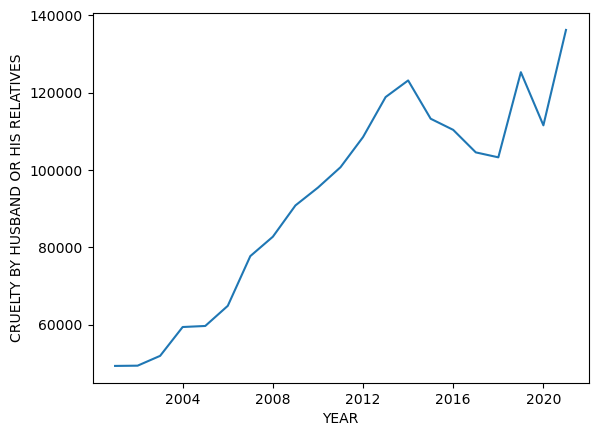

In [15]:
test_stationarity(data,'CRUELTY BY HUSBAND OR HIS RELATIVES')

In [16]:
data['shift1']=data['CRUELTY BY HUSBAND OR HIS RELATIVES'].shift()
data['shiftdiff1']=data['CRUELTY BY HUSBAND OR HIS RELATIVES']-data['shift1']

In [17]:
data

,CRUELTY BY HUSBAND OR HIS RELATIVES,rolling_mean,rolling_std,shift1,shiftdiff1
YEAR,,,,,
2001-01-01,49308,49308.0,NaN,NaN,NaN
2002-01-01,49372,49372.0,NaN,49308.0,64.0
2003-01-01,51914,51914.0,NaN,49372.0,2542.0
2004-01-01,59375,59375.0,NaN,51914.0,7461.0
2005-01-01,59643,59643.0,NaN,59375.0,268.0
2006-01-01,64856,64856.0,NaN,59643.0,5213.0
2007-01-01,77717,77717.0,NaN,64856.0,12861.0
2008-01-01,82731,82731.0,NaN,77717.0,5014.0
2009-01-01,90829,90829.0,NaN,82731.0,8098.0


In [18]:
data=data.drop('rolling_std', axis=1)

C:\Users\Amisha\AppData\Local\Temp\ipykernel_12860\640287474.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rolling_mean'] = dataframe[var].rolling(window=1).mean()
C:\Users\Amisha\AppData\Local\Temp\ipykernel_12860\640287474.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rolling_std'] = dataframe[var].rolling(window=1).std()


TEST STATS                    -3.741964
P-VALUE                        0.003560
# LAGS USED                    8.000000
NUMBER OF OBSERVATION USED    11.000000
dtype: float64
Criticality 1% : -4.223238279489106
Criticality 5% : -3.189368925619835
Criticality 10% : -2.729839421487603


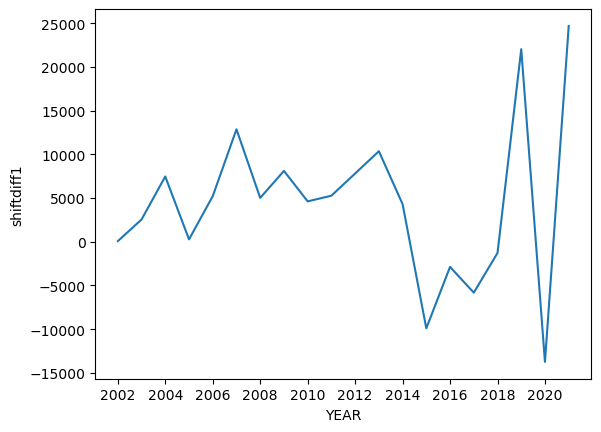

In [19]:
test_stationarity(data.dropna(),'shiftdiff1')

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [21]:
data['diff2']=data['CRUELTY BY HUSBAND OR HIS RELATIVES'].diff(2) 

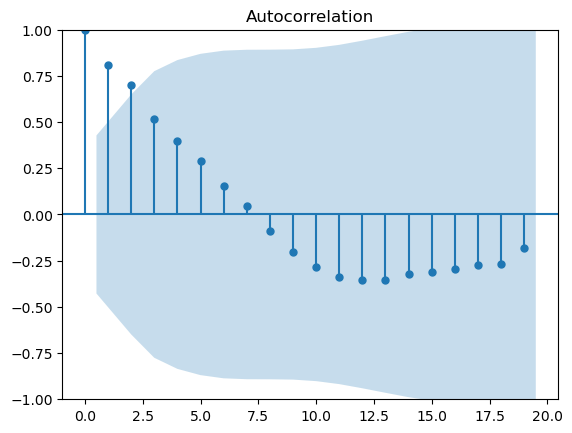

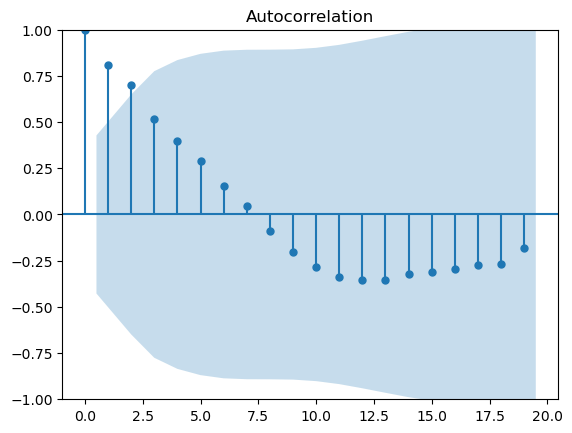

In [22]:
plot_acf(data['CRUELTY BY HUSBAND OR HIS RELATIVES'],lags=19)

G:\New folder\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


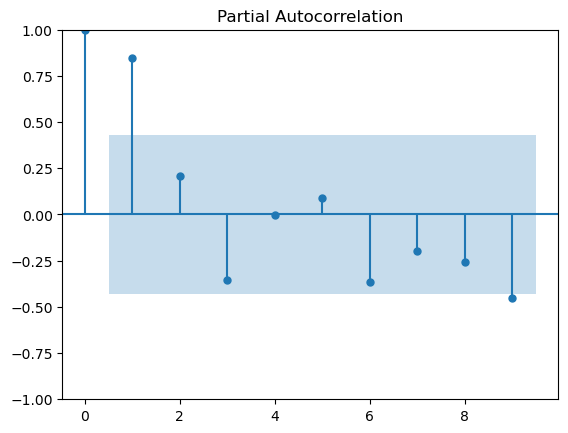

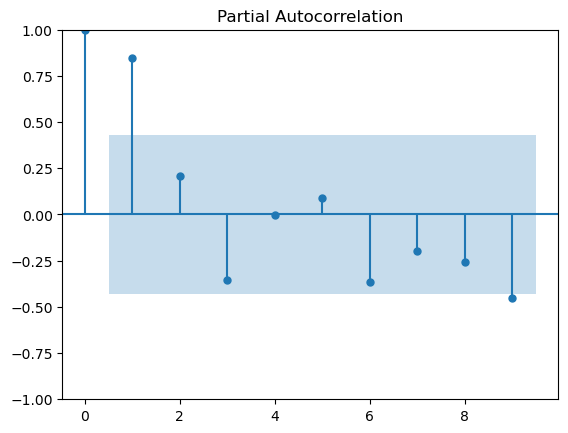

In [23]:
plot_pacf(data['CRUELTY BY HUSBAND OR HIS RELATIVES'],lags=9)

In [24]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [58]:
train=data[:round(len(data)*0.8)]
train.head()

,CRUELTY BY HUSBAND OR HIS RELATIVES,rolling_mean,shift1,shiftdiff1,diff2,arimapred,arimapred1
YEAR,,,,,,,
2001-01-01,49308,49308.0,NaN,NaN,NaN,NaN,NaN
2002-01-01,49372,49372.0,49308.0,64.0,NaN,NaN,NaN
2003-01-01,51914,51914.0,49372.0,2542.0,2606.0,NaN,NaN
2004-01-01,59375,59375.0,51914.0,7461.0,10003.0,NaN,NaN
2005-01-01,59643,59643.0,59375.0,268.0,7729.0,NaN,NaN


In [59]:
test=data[round(len(data)*0.8):]
test.head()

,CRUELTY BY HUSBAND OR HIS RELATIVES,rolling_mean,shift1,shiftdiff1,diff2,arimapred,arimapred1
YEAR,,,,,,,
2018-01-01,103272,103272.0,104551.0,-1279.0,-7105.0,NaN,NaN
2019-01-01,125298,125298.0,103272.0,22026.0,20747.0,101812.451419,101516.006727
2020-01-01,111549,111549.0,125298.0,-13749.0,8277.0,99429.400987,99810.051409
2021-01-01,136234,136234.0,111549.0,24685.0,10936.0,97290.079784,98098.846967


In [60]:

#import pmdarima as pm

# Select the desired column for analysis
#y_train = train['CRUELTY BY HUSBAND OR HIS RELATIVES']

# Apply auto_arima to the selected column
#model = pm.auto_arima(y_train, m=20, start_P=0, seasonal=True, d=1, trace=True,
 #                     error_action='ignore', suppress_warnings=True, stepwise=True)

In [61]:
model=ARIMA(train['CRUELTY BY HUSBAND OR HIS RELATIVES'], order=(1,2,2))

G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [62]:
model_fit=model.fit()

In [63]:
prediction=model_fit.predict(start=test.index[0], end=test.index[-1])

In [64]:
data['arimapred'] = prediction

<Axes: xlabel='YEAR', ylabel='CRUELTY BY HUSBAND OR HIS RELATIVES'>

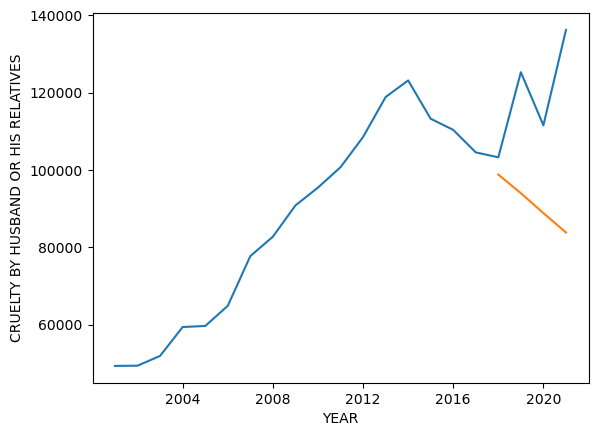

In [65]:
data.dropna()
sns.lineplot(data = data, x= data.index, y='CRUELTY BY HUSBAND OR HIS RELATIVES')
sns.lineplot(data = data, x= data.index, y='arimapred')


In [66]:
aic1=model_fit.aic
bic1=model_fit.bic
print("aic:",aic1)
print("bic:", bic1)

aic: 309.4723196969162
bic: 312.30452050132504


In [67]:
model1=ARIMA(train['CRUELTY BY HUSBAND OR HIS RELATIVES'], order=(1,2,0))

G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [68]:
model1_fit=model1.fit()

In [69]:
prediction1=model1_fit.predict(start=test.index[0], end=test.index[-1])

In [70]:
data['arimapred1'] = prediction1

<Axes: xlabel='YEAR', ylabel='CRUELTY BY HUSBAND OR HIS RELATIVES'>

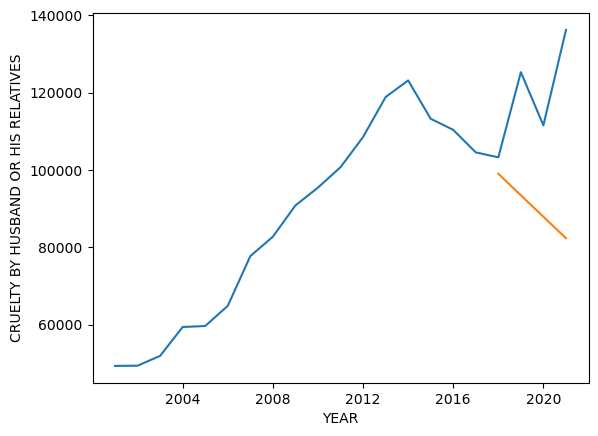

In [71]:
data.dropna()
sns.lineplot(data = data, x= data.index, y='CRUELTY BY HUSBAND OR HIS RELATIVES')
sns.lineplot(data = data, x= data.index, y='arimapred1')

In [72]:
aic=model1_fit.aic
bic=model1_fit.bic

In [73]:
print("aic:",aic)
print("bic:", bic)

aic: 307.2874505545835
bic: 308.70355095678786


In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
np.sqrt(mean_squared_error(test['CRUELTY BY HUSBAND OR HIS RELATIVES'], prediction1))

33522.18958349348

In [76]:
residuals = pd.DataFrame()
residuals['Residuals']=pd.DataFrame(model1_fit.resid)

In [77]:
#residuals.drop('0', axis=1, inplace=True)

<Axes: ylabel='Density'>

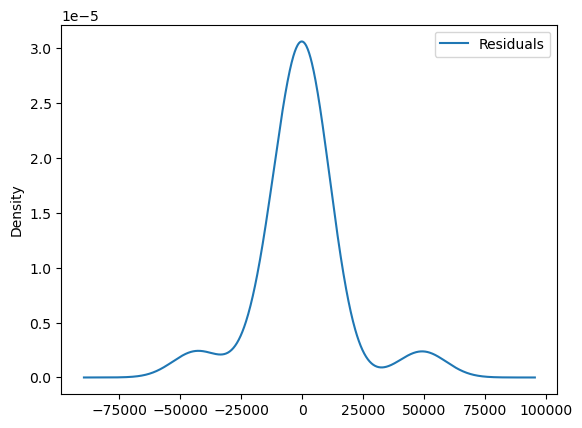

In [78]:
residuals.plot(kind='kde')

In [79]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:     CRUELTY BY HUSBAND OR HIS RELATIVES   No. Observations:                   17
Model:                                  ARIMA(1, 2, 0)   Log Likelihood                -151.644
Date:                                 Sat, 22 Jul 2023   AIC                            307.287
Time:                                         21:54:02   BIC                            308.704
Sample:                                     01-01-2001   HQIC                           307.272
                                          - 01-01-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1002      0.199     -0.505      0.614      -0.489       0.289
sigma2       3.61e+07   1.26e-09   2.86e+16      0.000    3.61e+07    3.61e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.41   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.24   Prob(JB):                         0.58
Heteroskedasticity (H):               1.85   Skew:                            -0.66
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.37e+32. Standard errors may be unstable.
"""

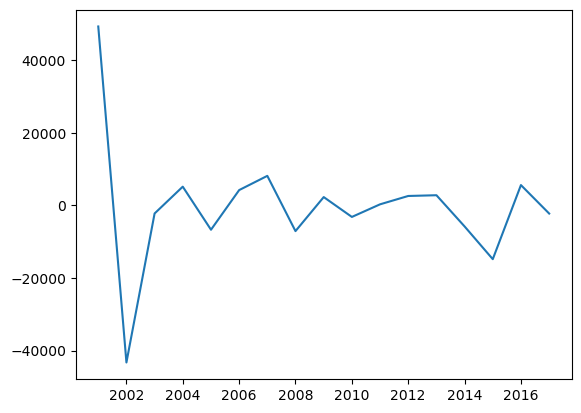

In [80]:
plt.plot(residuals)

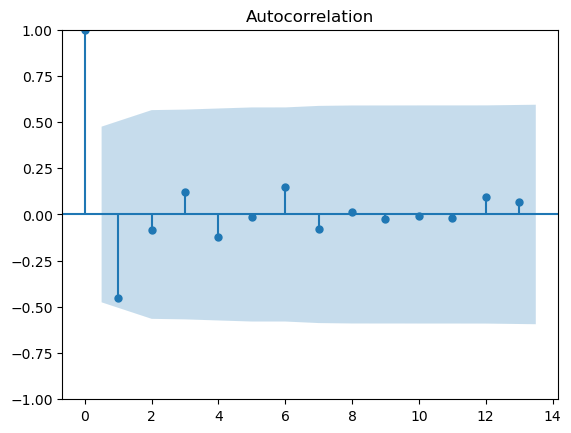

In [81]:
# Plot ACF
plot_acf(residuals)
plt.show()



G:\New folder\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


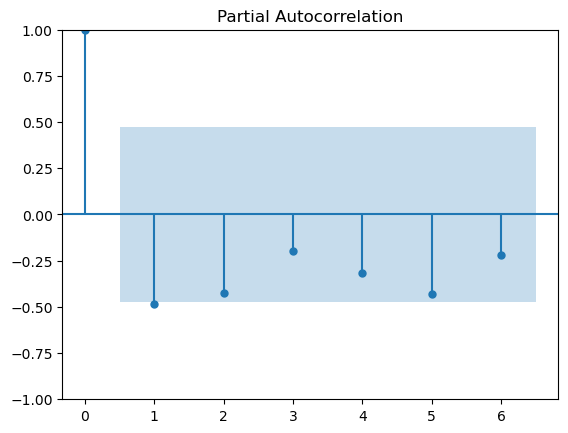

In [82]:
# Plot PACF
plot_pacf(residuals, lags=6)
plt.show()

In [83]:
from scipy.stats import kstest


# Extract the values from the residuals DataFrame
residual_values = residuals.values.flatten()

# Perform the K-S test for normality
test_statistic, p_value = kstest(residual_values, 'norm')

# Print the results
print('Test statistic:', test_statistic)
print('P-value:', p_value)

Test statistic: 0.5294117647058824
P-value: 5.685700180294793e-05


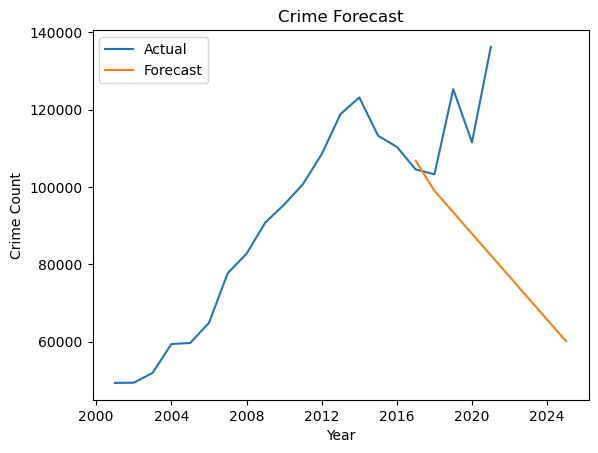

In [84]:
# Forecast future values
forecast = model1_fit.predict(start='2017-01-01', end='2024-12-31')

# Plot the forecasted values
plt.plot(data.index, data['CRUELTY BY HUSBAND OR HIS RELATIVES'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Crime Forecast')
plt.legend()
plt.show()